In [1]:
#Import packages
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library(pairwiseAdonis)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: cluster



In [50]:
# Read qza files 
#Import count table
ASV_table <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/tableV_BacArc_99_SCTLD.qza")
ASV_table <- ASV_table$data 
#Import taxon
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxa_16S <- taxa_16S[-1,]


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 58895 rows [2, 4, 9, 10, 14, 16, 19, 23, 24, 27, 33, 35, 37, 42, 43, 46, 50, 51, 57, 58, ...].”


In [48]:
#Import tree
tree_file <-read_tree("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/exported-tree//tree.nwk")

#Import metadata file
meta_data <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

# Bar graphs summarizing data sources

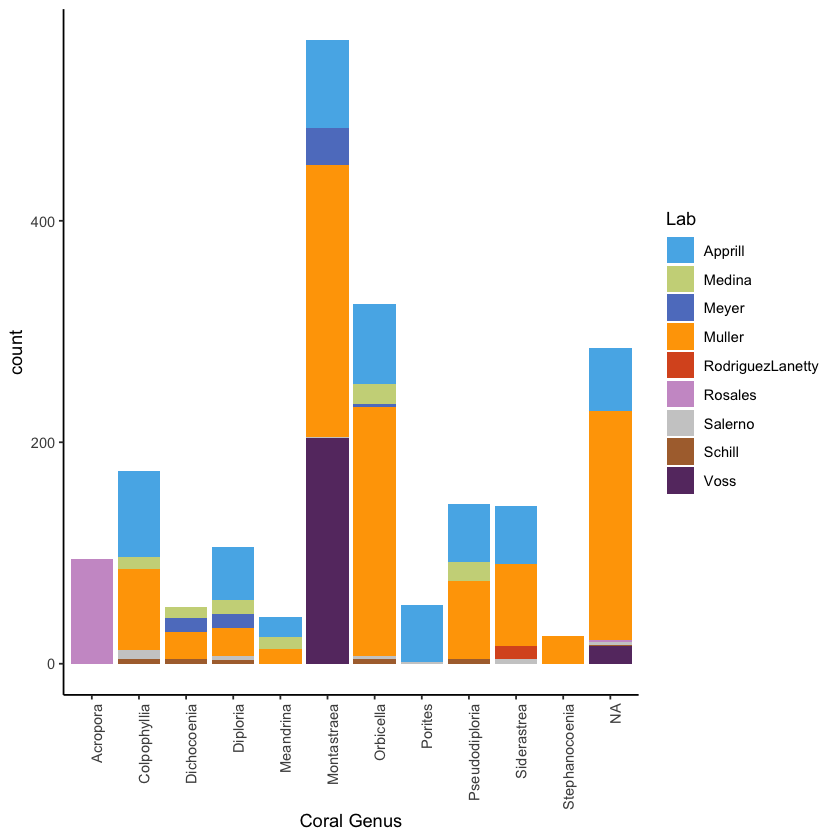

In [49]:
ggplot(meta_data,
       aes(x =field_host_genus_id)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab("Coral Genus")

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/num_sp.png",
 #       width = 5, height = 5, units = "in", dpi=250)

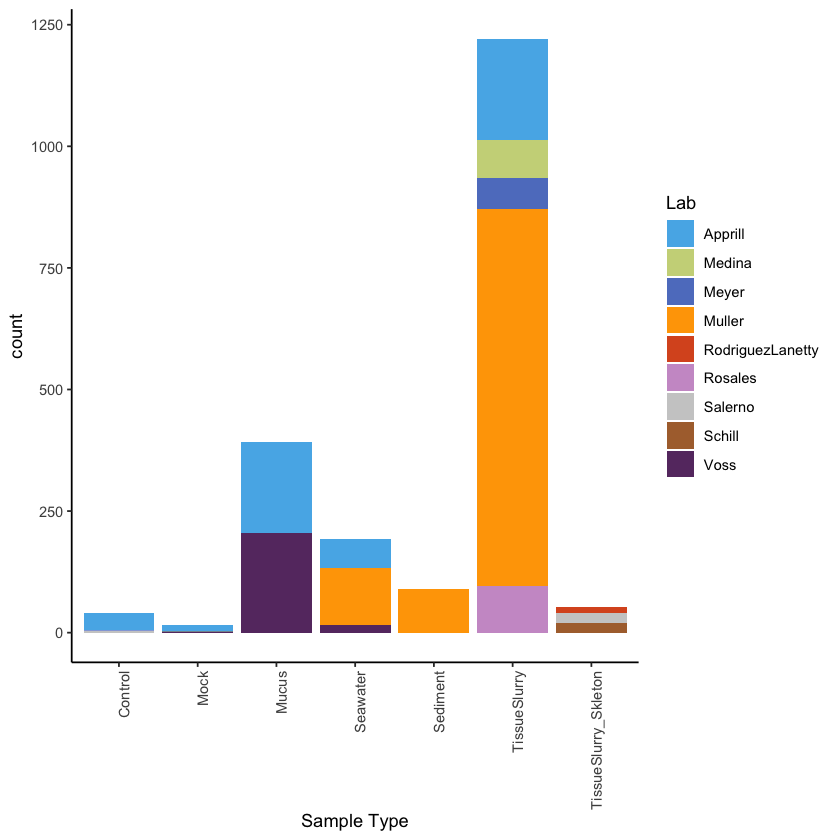

In [6]:
ggplot(sample_info_tab_16S,
       aes(x =sample_type)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab("Sample Type") 



#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/num_sampletype.png",
#        width = 5, height = 5, units = "in", dpi=250)

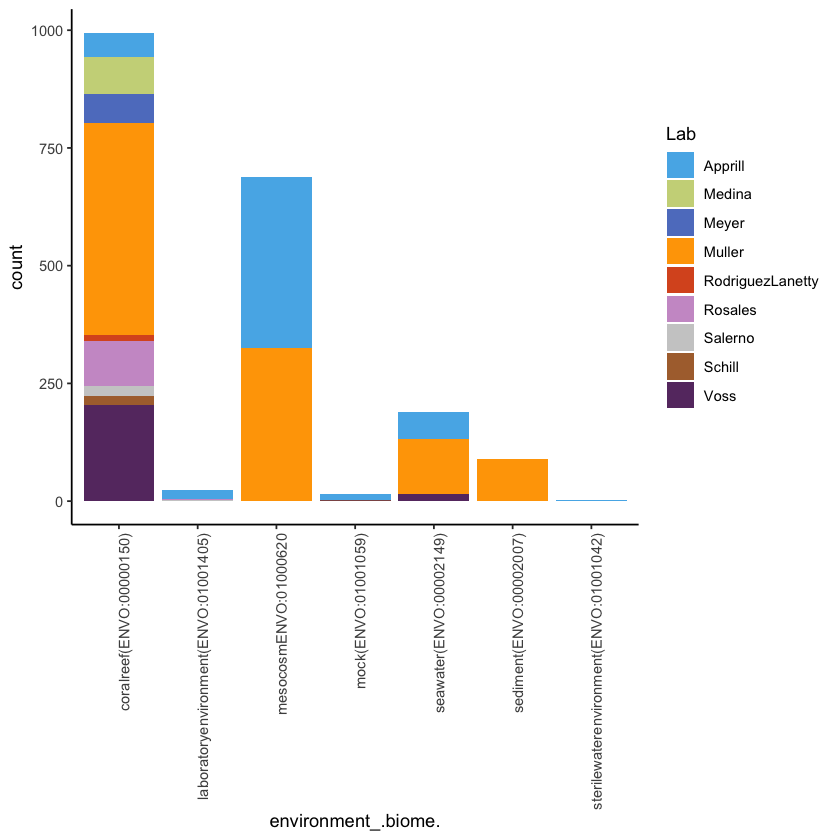

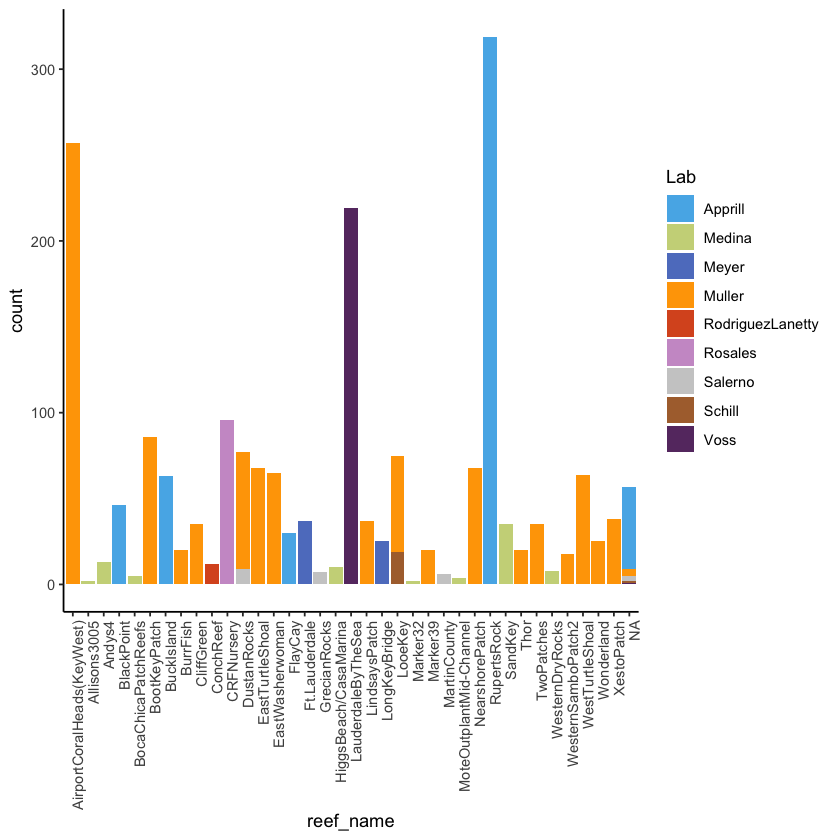

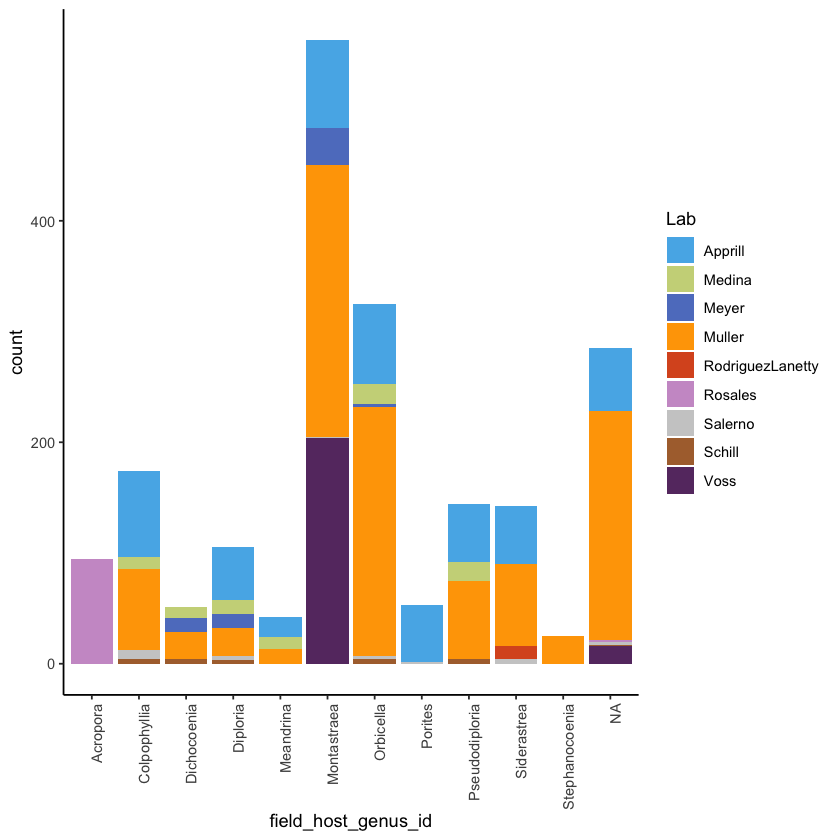

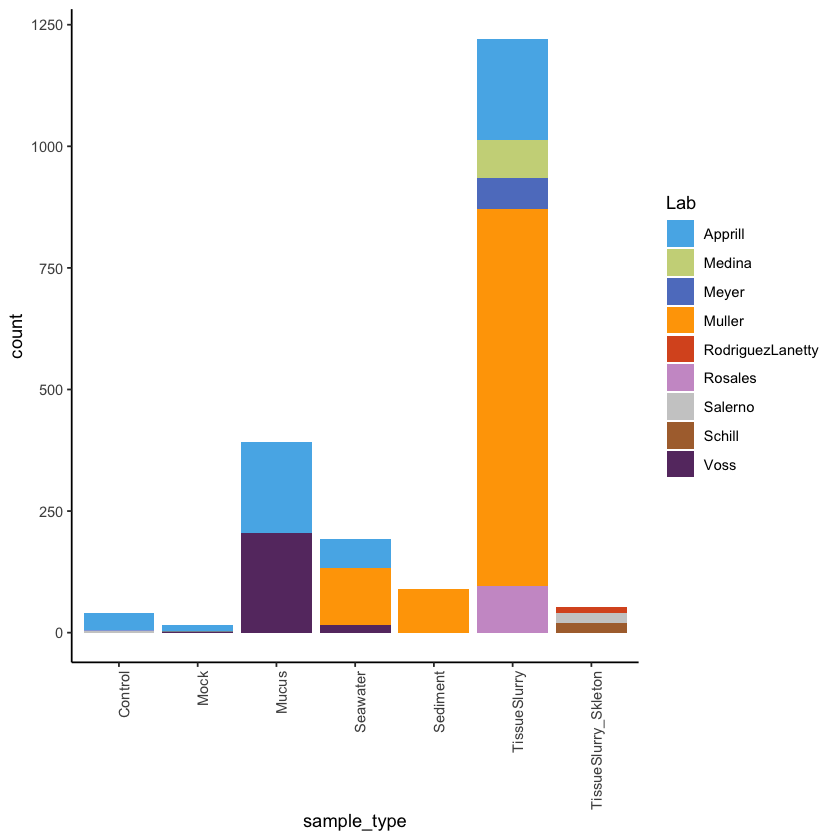

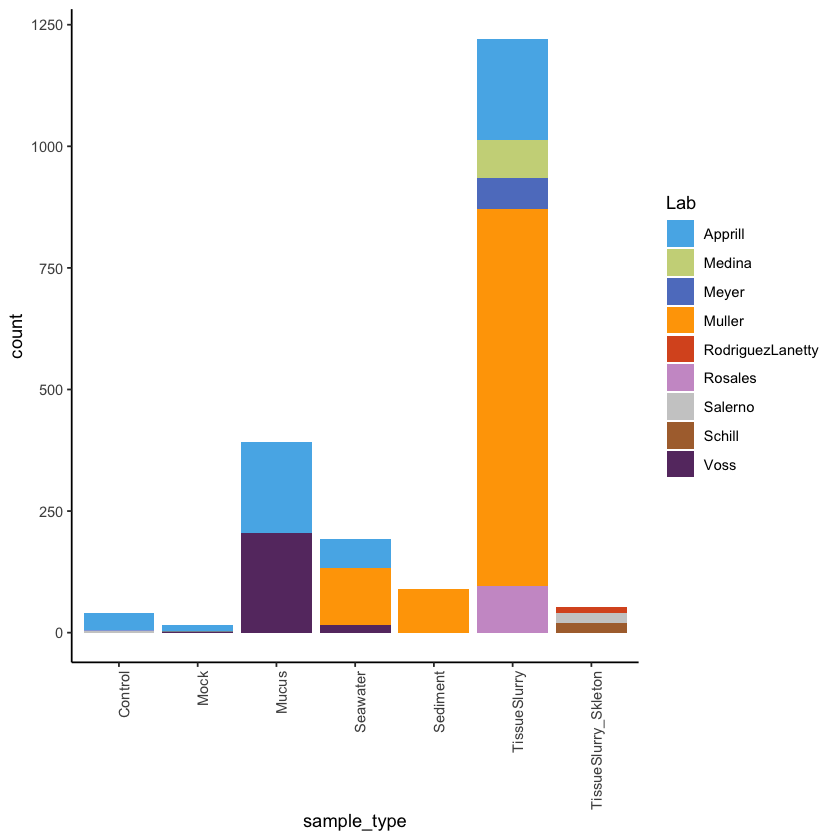

In [7]:
ggplot(sample_info_tab_16S,
       aes(x =environment_.biome.)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))


ggplot(sample_info_tab_16S,
       aes(x =reef_name)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))


ggplot(sample_info_tab_16S,
       aes(x =field_host_genus_id)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))



ggplot(sample_info_tab_16S,
       aes(x =sample_type)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))



ggplot(sample_info_tab_16S,
       aes(x =sample_type)) + 
geom_bar(aes(fill=Lab)) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
#facet_grid(Treatment~Host_Species, scales="free") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [51]:
#Make a phyloseq object
physeq_16S <- phyloseq(otu_table(ASV_table, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta_data), tree_file)
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 2003 samples ]
sample_data() Sample Data:       [ 2003 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 97411 tips and 97398 internal nodes ]

In [9]:
#select only biomes from corals, seawater, and sediment

ps =subset_samples(physeq_16S, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skleton" |
                        sample_type=="Seawater" | sample_type=="Sediment")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 1948 samples ]
sample_data() Sample Data:       [ 1948 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 97411 tips and 97398 internal nodes ]

In [10]:
#Remove low abundance reads
ps = filter_taxa(ps, function(x) sum(x > 20) > (0.01*length(x)), TRUE)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3285 taxa and 1948 samples ]
sample_data() Sample Data:       [ 1948 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 3285 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3285 tips and 3284 internal nodes ]

In [11]:
#select only samples from corals 
ps_coral =subset_samples(ps, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skleton"
                        )
ps_coral

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3285 taxa and 1666 samples ]
sample_data() Sample Data:       [ 1666 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 3285 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3285 tips and 3284 internal nodes ]

In [12]:
#transform data to center log ratio
ps_clr <- microbiome::transform(ps, 'clr')


In [13]:
psr_clr.ord <- ordinate(ps_clr, "RDA", "euclidean")

# Ordination plots 

Warning message in plot_ordination(ps_clr, psr_clr.ord, color = "Lab", shape = "pimers_names", :
“Shape variable was not found in the available data you provided.No shape mapped.”


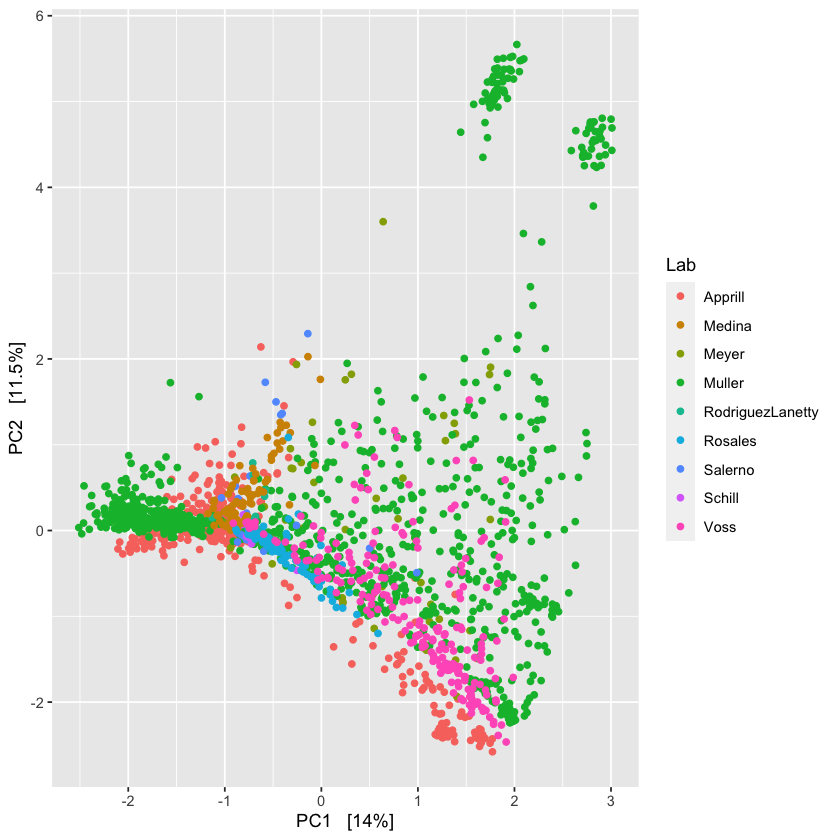

In [14]:
ord_lab = plot_ordination(ps_clr, psr_clr.ord,
                                 color="Lab",
                              shape="pimers_names", axes = c(1,2)) 
ord_lab

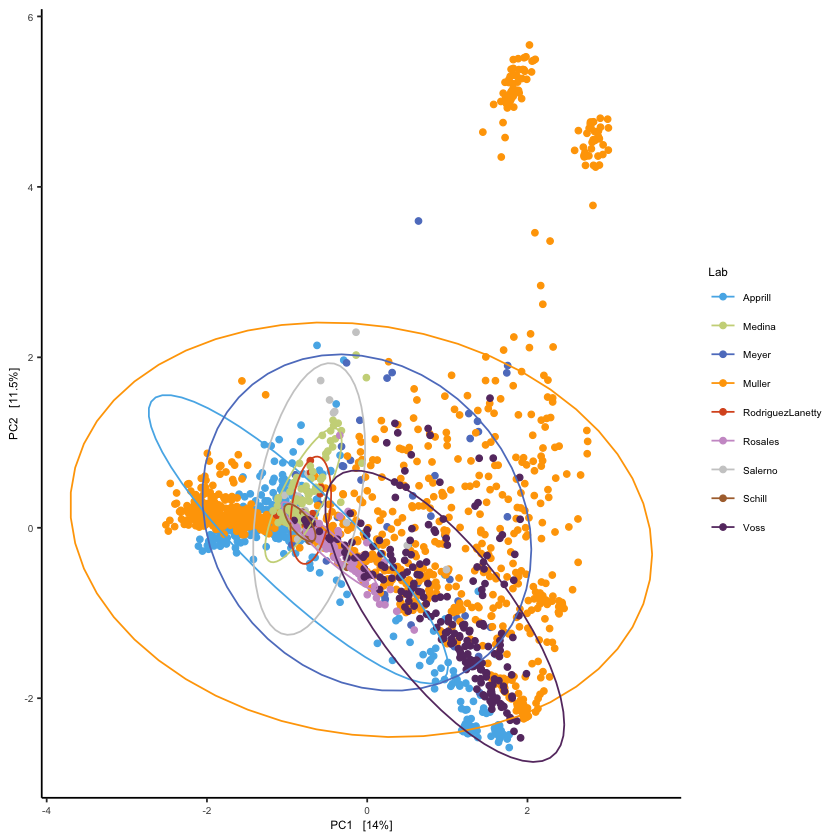

In [15]:
ord_lab +
scale_color_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

stat_ellipse()

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/lab_type.png",
        width = 5, height = 5, units = "in", dpi=250)

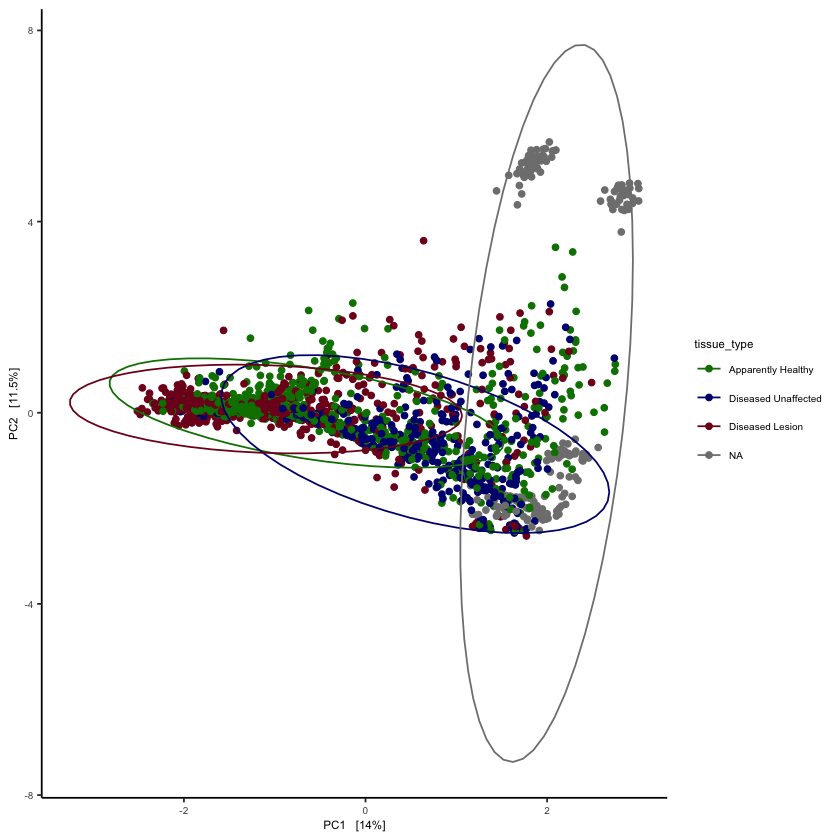

In [16]:
sample_data(ps_clr)$tissue_type = factor(sample_data(ps_clr)$tissue_type,
                                  c("AH", "DU", "DL")) 

plot_ordination(ps_clr, psr_clr.ord,
                               color="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=6),
     legend.title=element_text(size=7)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +
scale_color_manual(values=c("#007f00", "Navy", "#800020"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion")) +
stat_ellipse()

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/Ord_health.png",
 #       width = 5, height = 5, units = "in", dpi=250)

# Dispersion analysis 

In [27]:

dis_clr <- vegdist(otu_table(t(ps_coral)), method ="euclidean")
# PERMDISP2 procedure for the analysis of multivariate homogeneity of group dispersions (variances).
mod_clr <- betadisper(dis_clr, sample_data(ps_coral)$tissue_type)
mod_clr
mod_dist_clr= as.data.frame(mod_clr$distances)
dim(mod_dist_clr)
mod_dist_df_clr=cbind(sample_data(ps_coral), mod_dist_clr) 
head(mod_dist_df_clr)


	Homogeneity of multivariate dispersions

Call: betadisper(d = dis_clr, group =
sample_data(ps_coral)$tissue_type)

No. of Positive Eigenvalues: 1305
No. of Negative Eigenvalues: 0

Average distance to median:
   AH    DL    DU 
34370 57844 23992 

Eigenvalues for PCoA axes:
(Showing 8 of 1305 eigenvalues)
    PCoA1     PCoA2     PCoA3     PCoA4     PCoA5     PCoA6     PCoA7     PCoA8 
1.803e+12 1.182e+12 9.756e+11 6.929e+11 3.598e+11 2.414e+11 1.654e+11 1.227e+11 

[1] 1666    1

,BioSample,Run,SRA_accession,Lab,Experiment,Alias,Collection_ID,collection_time,collection_year,collection_month,⋯,forwardPrimer,ReversePrimer,linkerPrimerSequence,platform,platformChemistry,sequencing_facility,barcodes,basepairs,notes,mod_clr$distances
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
102tiss_S3,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,102tiss,3:08:00PM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,75963.67
220tiss_S33,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,220tiss,10:11:00AM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,25146.98
222tiss_S34,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,222tiss,10:11:00AM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,55585.14
225tis_S40,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,225tis,10:11:00AM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,41629.45
232tiss_S41,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,232tiss,10:11:00AM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,20288.46
262tiss_S35,TBD,Run1_BPC29622-1521,TBD,Apprill,FieldSampling_SCTLD_USVI_Feb2020,USVIFeb2020,262tiss,12:23:00PM,2020,February,⋯,GTGYCAGCMGCCGCGGTAA,GGACTACNVGGGTWTCTAAT,TBD,Illumina,iSeq100i1,"HomeRentalonSt.Thomas,USVI",NA,150,NA,31973.70


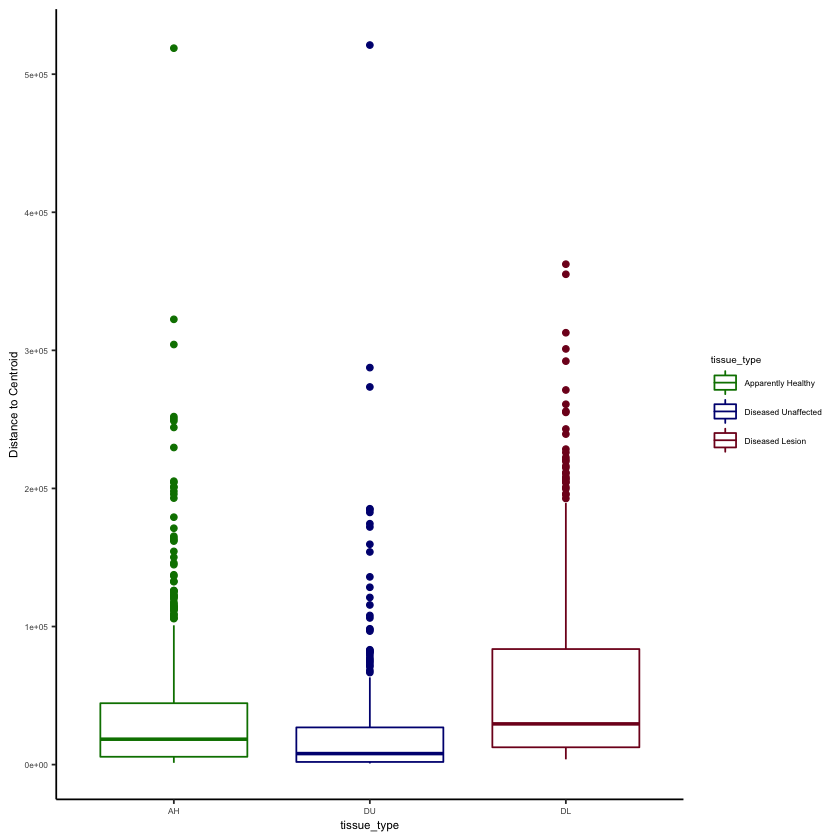

In [33]:
#plot variance 
#cbPalette <- c( "#009E73","#696969", "#D55E00")
mod_dist_df_clr$tissue_type = factor(mod_dist_df_clr$tissue_type,
                                  c("AH", "DU", "DL")) 


ggplot(mod_dist_df_clr,
       aes(x=tissue_type, y=mod_clr$distances)) +
geom_boxplot(aes(color=tissue_type)) +
#scale_color_manual(values = cbPalette) +
theme_linedraw() +
theme_classic() +
ylab("Distance to Centroid") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +

scale_color_manual(values=c("#007f00", "Navy", "#800020"),
                  labels=c(AH="Apparently Healthy",
                            DU="Diseased Unaffected", 
                            DL="Diseased Lesion"))

In [35]:

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
permutest(mod_clr, pairwise = TRUE, permutations = 999)
TukeyHSD(mod_clr)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
            Df     Sum Sq    Mean Sq      F N.Perm Pr(>F)    
Groups       2 2.9479e+11 1.4740e+11 52.248    999  0.001 ***
Residuals 1663 4.6915e+12 2.8211e+09                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           AH         DL    DU
AH            1.0000e-03 0.002
DL 2.4095e-14            0.001
DU 6.5226e-04 2.3619e-17      

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
           diff       lwr        upr     p adj
DL-AH  23473.73  16545.76  30401.704 0.0000000
DU-AH -10378.56 -18458.82  -2298.295 0.0074003
DU-DL -33852.29 -42318.01 -25386.575 0.0000000


# Group differences 

In [38]:


ps_clr_df=as.data.frame(otu_table(t(ps_coral)))
ps_clr_meta= as(sample_data(ps_coral), "data.frame")

adonis(ps_clr_df~tissue_type, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean") 



Call:
adonis(formula = ps_clr_df ~ tissue_type, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df  SumsOfSqs    MeanSqs F.Model      R2 Pr(>F)    
tissue_type    2 1.3976e+11 6.9879e+10  15.627 0.01845  0.001 ***
Residuals   1663 7.4365e+12 4.4717e+09         0.98155           
Total       1665 7.5763e+12                    1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [44]:
pairwise.adonis(ps_clr_df, ps_clr_meta$tissue_type, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AH vs DU,1,14196979202,4.565399,0.004159569,0.002,0.006,*
AH vs DL,1,106729934353,21.569761,0.016138148,0.001,0.003,*
DU vs DL,1,83398285011,15.412665,0.016512166,0.001,0.003,*


# Taxonomy summary

In [40]:
sum_ps   <- ps  %>%
  tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


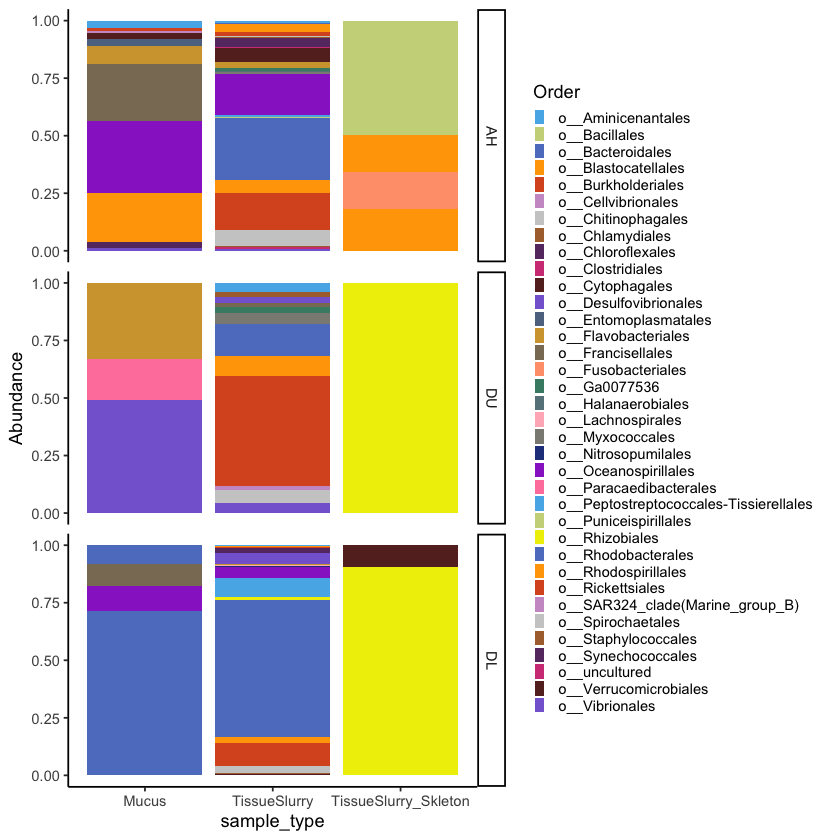

In [41]:
sum_ps$tissue_type <- factor(sum_ps$tissue_type, 
    levels = c("AH","DU", "DL"))
ggplot(subset(sum_ps, Abundance >0.5 ), 
       aes(x =sample_type, y=Abundance, fill=Order)) + 
geom_bar(stat="identity", position="fill") +
facet_grid(tissue_type~., scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.5, , keyheight =.70, ncol=1)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme_classic()

In [52]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             